In [29]:
from imp import reload
import matplotlib.pyplot as plt
import autoencoder as aelib
reload(aelib)


<module 'autoencoder' from '/home/mike/py/kaggle/kaggle_data_bowl/autoencoder.py'>

In [12]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras_tqdm import TQDMNotebookCallback


In [26]:
def draw_digit(generator, z_sample, digit_size = 28, n=1):
    z_sample = np.array(z_sample).reshape(1,2)
    figure = np.zeros((digit_size * n, digit_size * n))
    x_decoded = generator.predict(z_sample)
    digit = x_decoded[0].reshape(digit_size, digit_size)
    i, j = 0,0
    figure[i * digit_size: (i + 1) * digit_size,
           j * digit_size: (j + 1) * digit_size] = digit
    plt.figure(figsize=(2, 2))
    plt.imshow(figure)
    plt.show()
    
def graph_digits(x_test_encoded, dims=(0,1), lim=None):
#     colors = ['silver', 'w', 'orange', 'lime', 'y', 'r', 'darkgreen', 'cyan', 'blue', 'darkviolet']     # synesthesia scheme
    colors = ['silver', 'brown', 'red', 'orange', 'yellow', 'green', 'blue', 'violet', 'cyan', 'white' ]
    plt.figure(figsize=(6, 6))
    plots =[]
    for digit in range(10):
        mask = y_test==digit
        xd, yd = dims
        plots.append(plt.scatter(x_test_encoded[:, xd][mask], x_test_encoded[:, yd][mask], c=colors[digit]))
    ax = plt.gca()
    ax.legend(plots, range(10))
    plt.scatter(0,0, s=10, marker='*', c='y')
    if lim is not None:
        plt.xlim((-lim,lim))
        plt.ylim((-lim,lim))
    plt.show()

In [3]:
# train the VAE on MNIST digits
original_img_size = (28,28, 1)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
batch_size = 100
print(original_img_size)
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0],) + original_img_size)
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((x_test.shape[0],) + original_img_size)

(28, 28, 1)


In [4]:
# one hot encode outputs
y_train_oh = np_utils.to_categorical(y_train)
y_test_oh = np_utils.to_categorical(y_test)
num_classes = y_test_oh.shape[1]
print(y_train.shape, y_test_oh.shape)
print('x_train.shape:', x_train.shape)
print('x_train.shape:', x_train.shape)

(60000,) (10000, 10)
x_train.shape: (60000, 28, 28, 1)
x_train.shape: (60000, 28, 28, 1)


In [46]:
reload(aelib)
ae = aelib.VAE_MNIST_0(compile_decoder=False)

(28, 28, 1)


/home/mike/py/kaggle/kaggle_data_bowl/autoencoder.py:170: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`
  conv_2 = Conv2D(n_filters, px_conv, px_conv, border_mode='same', activation='relu',
/home/mike/py/kaggle/kaggle_data_bowl/autoencoder.py:172: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", strides=(2, 2), activation="relu")`
  stack = Conv2D(n_filters, px_conv, px_conv, border_mode='same', activation='relu',
/home/mike/py/kaggle/kaggle_data_bowl/autoencoder.py:174: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", name="stack_base", activation="relu")`
  
/home/mike/py/kaggle/kaggle_data_bowl/autoencoder.py:183: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", strides=(1, 1), name="stack_0", activation="relu")`
  
/home/mike/py/kaggle/kaggle_data_bowl/autoencoder.py:183: UserWa

In [47]:
print('shapes: ', x_train.shape, x_test.shape)
vae = ae.model
print(vae.summary())

shapes:  (60000, 28, 28, 1) (10000, 28, 28, 1)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input (InputLayer)          (100, 28, 28, 1)      0                                            
____________________________________________________________________________________________________
conv2d_30 (Conv2D)               (100, 28, 28, 64)     640                                          
____________________________________________________________________________________________________
conv2d_31 (Conv2D)               (100, 14, 14, 64)     36928                                        
____________________________________________________________________________________________________
stack_base (Conv2D)              (100, 14, 14, 64)     36928                                        
____________________________________________

In [48]:
vae.fit(x_train, x_train,
        shuffle=True,
        nb_epoch=1,
        batch_size=batch_size,
        validation_data=(x_test, x_test),
        verbose=False,
        callbacks=[TQDMNotebookCallback()])

/home/mike/ve/keras/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


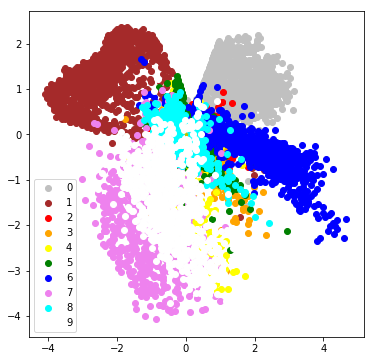

In [49]:
encoder = ae.encoder
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
graph_digits(x_test_encoded)